In [2]:
#initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [6]:
# Set the file path 
# ***note Project 1 may need to be removed I had to add this for my file path because of how barried I have my project files.
file_path = "../Project 1/Resources/car_prices.csv"
df_used_car_sales = pd.read_csv(file_path,on_bad_lines='skip')

# Show first 5 rows
df_used_car_sales.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
# Showing the data types
df_used_car_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [5]:
#Data Type conversion for year and selling price
dtype_conversion = { 'year': 'int', 'sellingprice': 'float64'}

# Convert multiple columns to specified data types
car_sales_df = df_used_car_sales.astype(dtype_conversion)

# Verify the changes
print(car_sales_df.dtypes)
print(car_sales_df.head())

year              int32
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice    float64
saledate         object
dtype: object
   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    

In [5]:
# Sort the DataFrame by year, make, and selling price
sorted_car_sales_df = car_sales_df.sort_values(by=['year', 'model', 'sellingprice'])

In [6]:
# Group by year and make, then sum the selling prices with out breaking it down by top 5
grouped_data = sorted_car_sales_df.groupby(['year', 'model'])['sellingprice'].sum().reset_index()


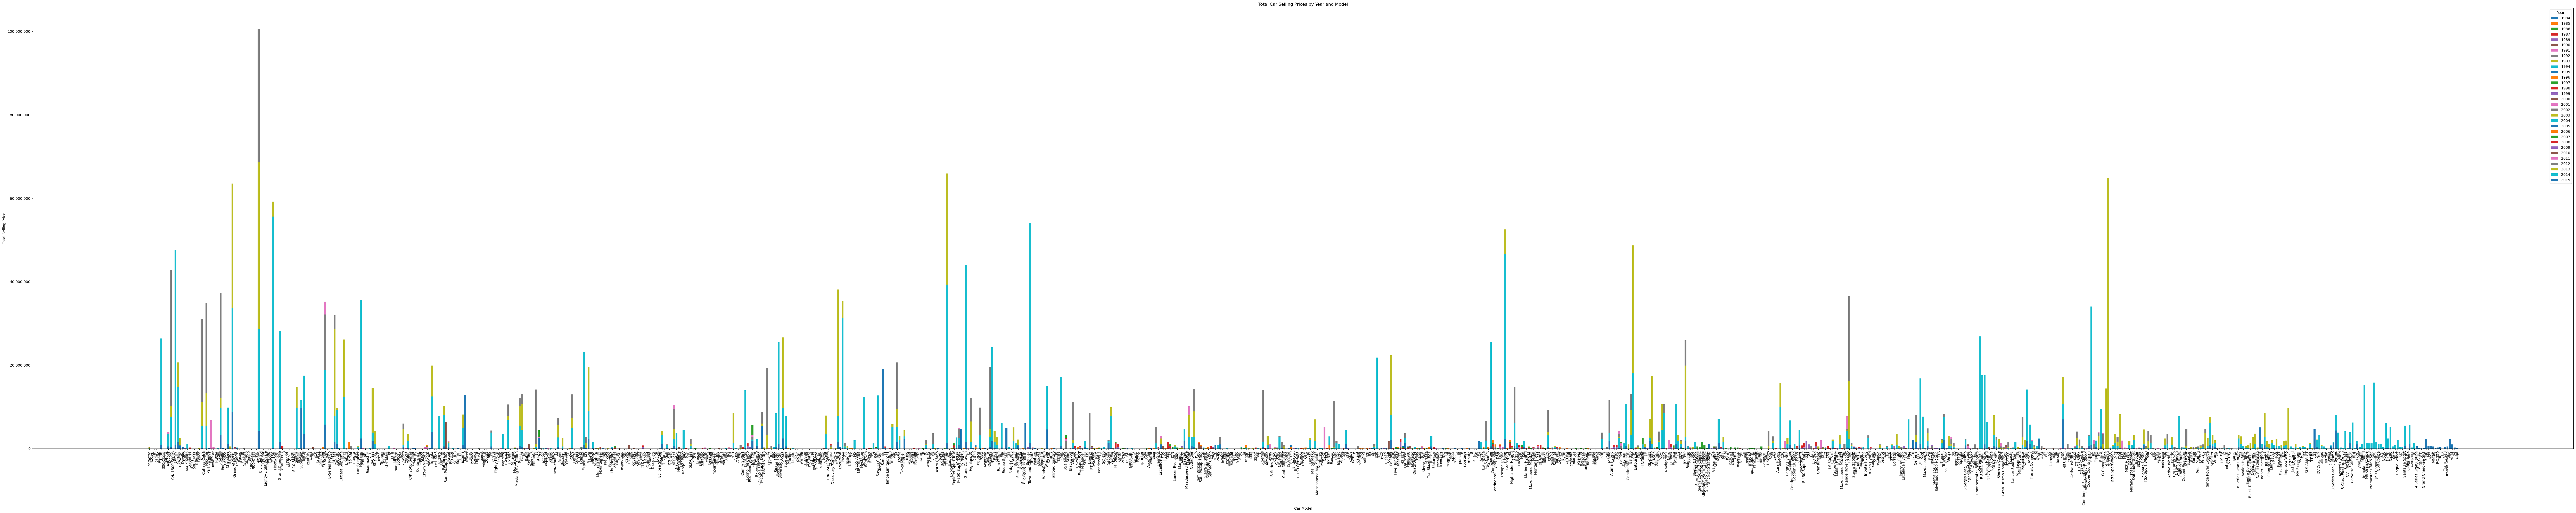

In [7]:
# Plotting the data
plt.figure(figsize=(100, 20))

# Bar plot found this way to make the arguments more lined up and easy to read.
for key, grp in grouped_data.groupby('year'):
    plt.bar(grp['model'], grp['sellingprice'], label=str(key))

plt.xlabel('Car Model')
plt.ylabel('Total Selling Price')
plt.title('Total Car Selling Prices by Year and Model')
plt.legend(title='Year')
plt.xticks(rotation=90)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()

plt.show()

In [8]:
# Sort the DataFrame by year, make, and selling price
sorted_car_sales_df = car_sales_df.sort_values(by=['year', 'model', 'sellingprice'])

In [9]:
# Group by year and make, average selling prices
grouped_data = sorted_car_sales_df.groupby(['year', 'model'])['sellingprice'].mean().reset_index()


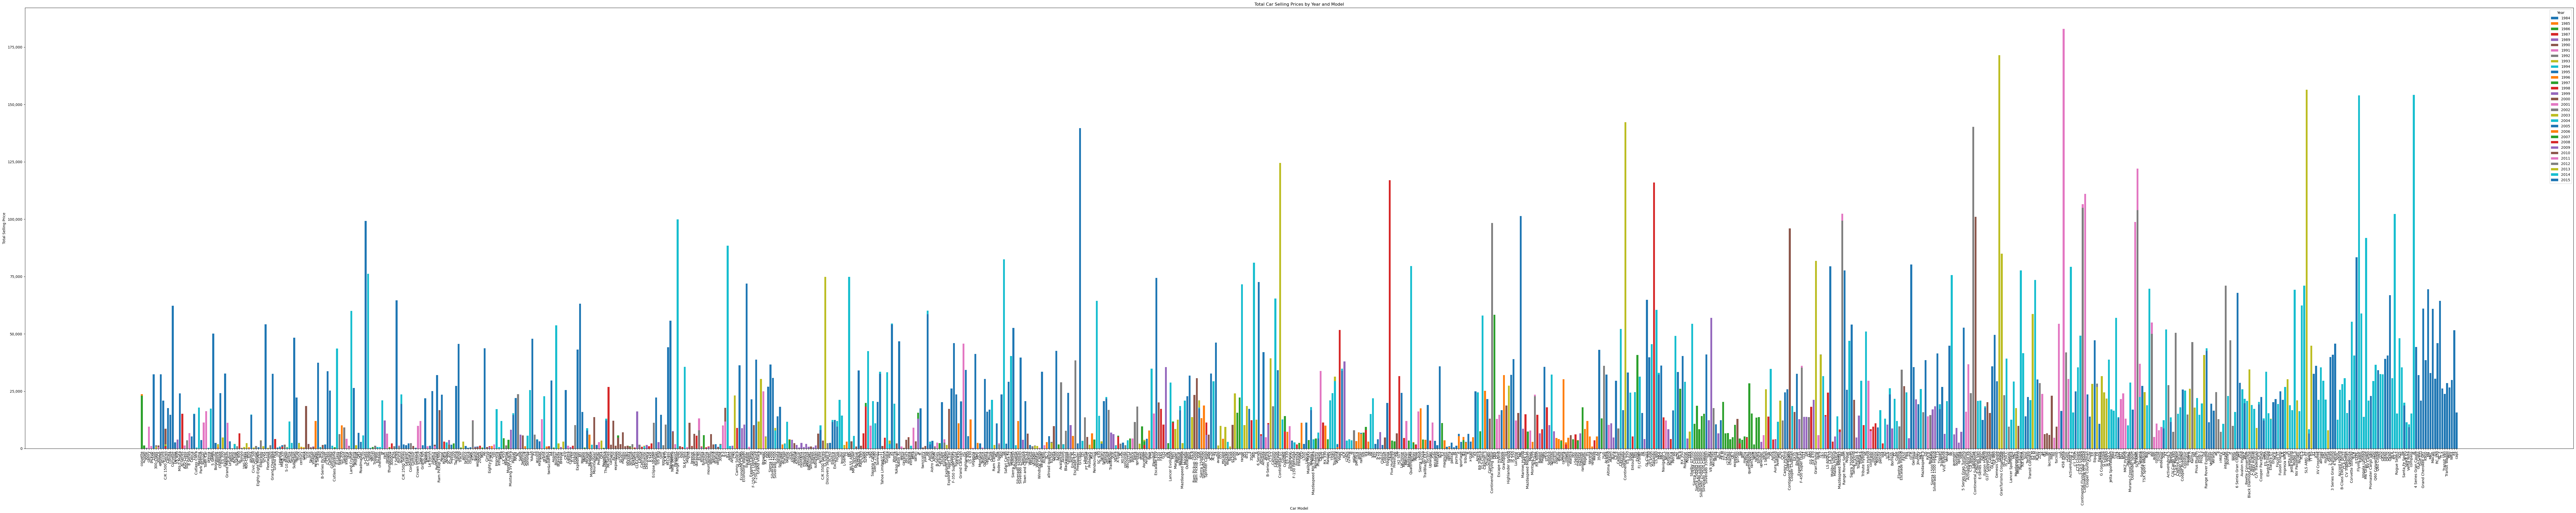

In [10]:
# Plotting the data
plt.figure(figsize=(100, 20))

# Bar plot found this way to make the arguments more lined up and easy to read.
for key, grp in grouped_data.groupby('year'):
    plt.bar(grp['model'], grp['sellingprice'], label=str(key))

plt.xlabel('Car Model')
plt.ylabel('Total Selling Price')
plt.title('Total Car Selling Prices by Year and Model')

plt.legend(title='Year')

plt.xticks(rotation=90)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()

plt.show()

In [11]:
# My different year groupings 
# start_year = 1984
# end_year = 1995

# start_year = 1996
# end_year = 2005

start_year = 2006
end_year = 2015
# Setting the start to end year range
sliced_df = car_sales_df.loc[(car_sales_df['year'] >= start_year) & (car_sales_df['year'] <= end_year)]

# Sort the DataFrame by year, make, and selling price
sorted_car_sales_df = sliced_df.sort_values(by=['year', 'model', 'sellingprice'])

In [12]:
# Group by year and make, average selling prices
grouped_data = sorted_car_sales_df.groupby(['year', 'model'])['sellingprice'].mean().reset_index()

# Get the top 5 selling makes for each year
top_5_makes = grouped_data.nlargest(5, 'sellingprice')

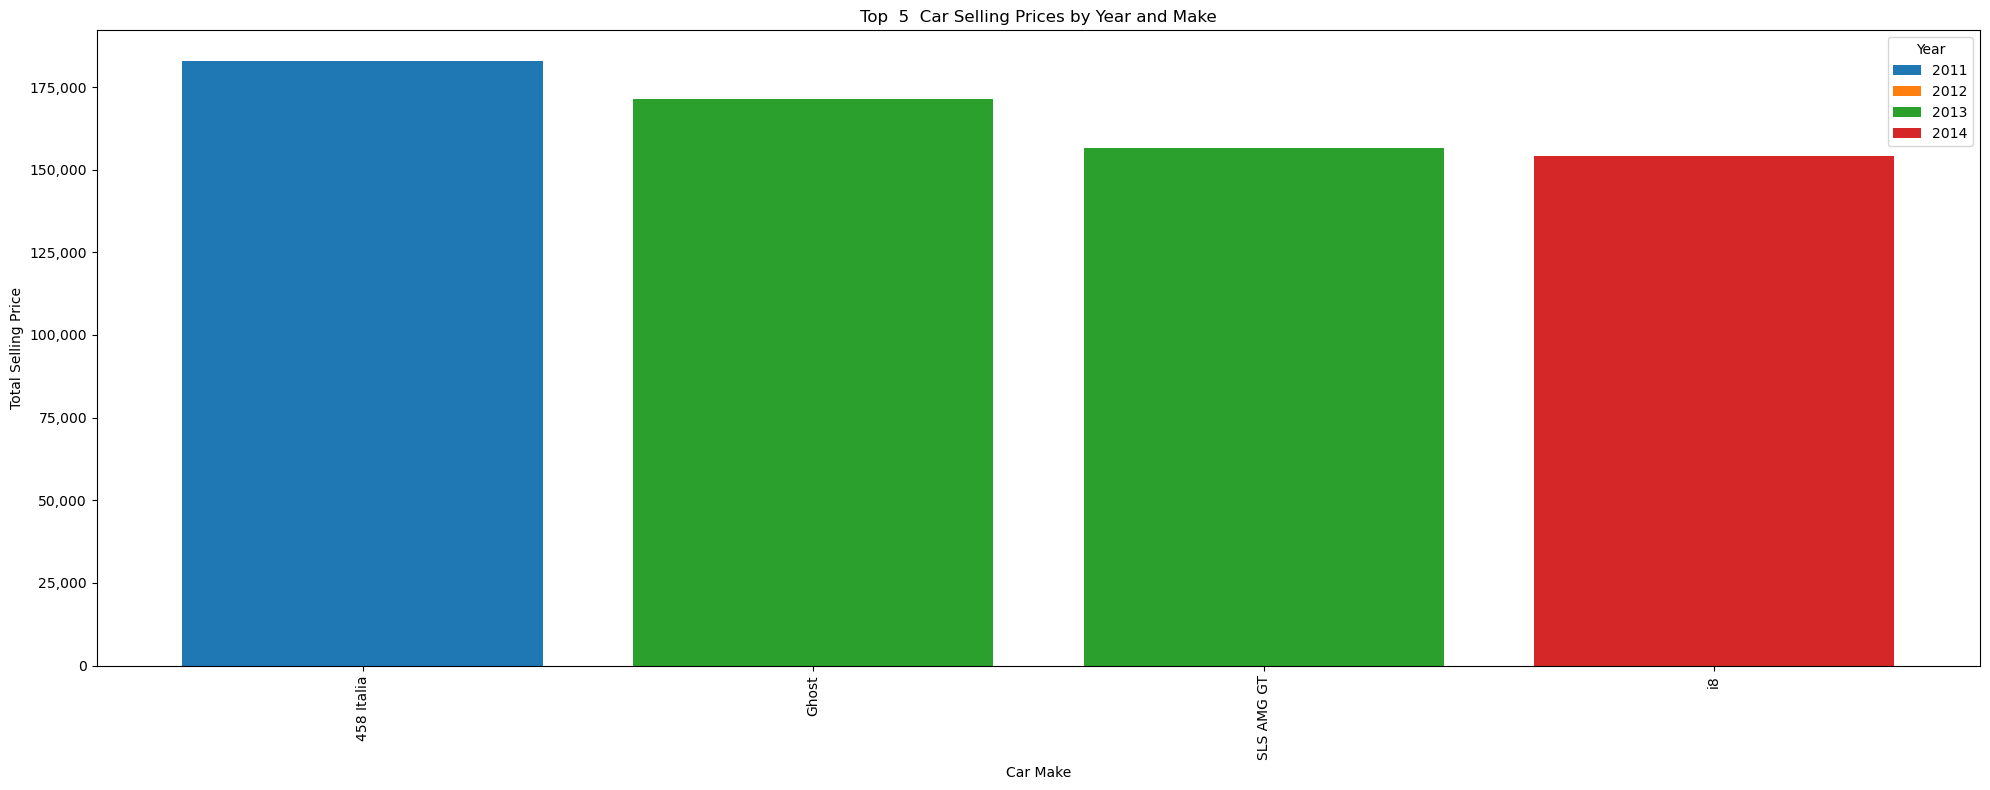

In [13]:
# Plotting the data
plt.figure(figsize=(20, 8))

# Bar plot found this way to make the arguments more lined up and easy to read.
for key, grp in top_5_makes.groupby('year'):
    plt.bar(grp['model'], grp['sellingprice'], label=str(key))

plt.xlabel('Car Make')
plt.ylabel('Total Selling Price')
plt.title('Top  5  Car Selling Prices by Year and Make')
plt.legend(title='Year')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [14]:
# Sort the DataFrame by year, make, and selling price
sorted_car_sales_df = car_sales_df.sort_values(by=['year', 'make', 'sellingprice'])

In [15]:
# Group by year and make, average selling prices
grouped_data = sorted_car_sales_df.groupby(['year', 'make'])['sellingprice'].sum().reset_index()


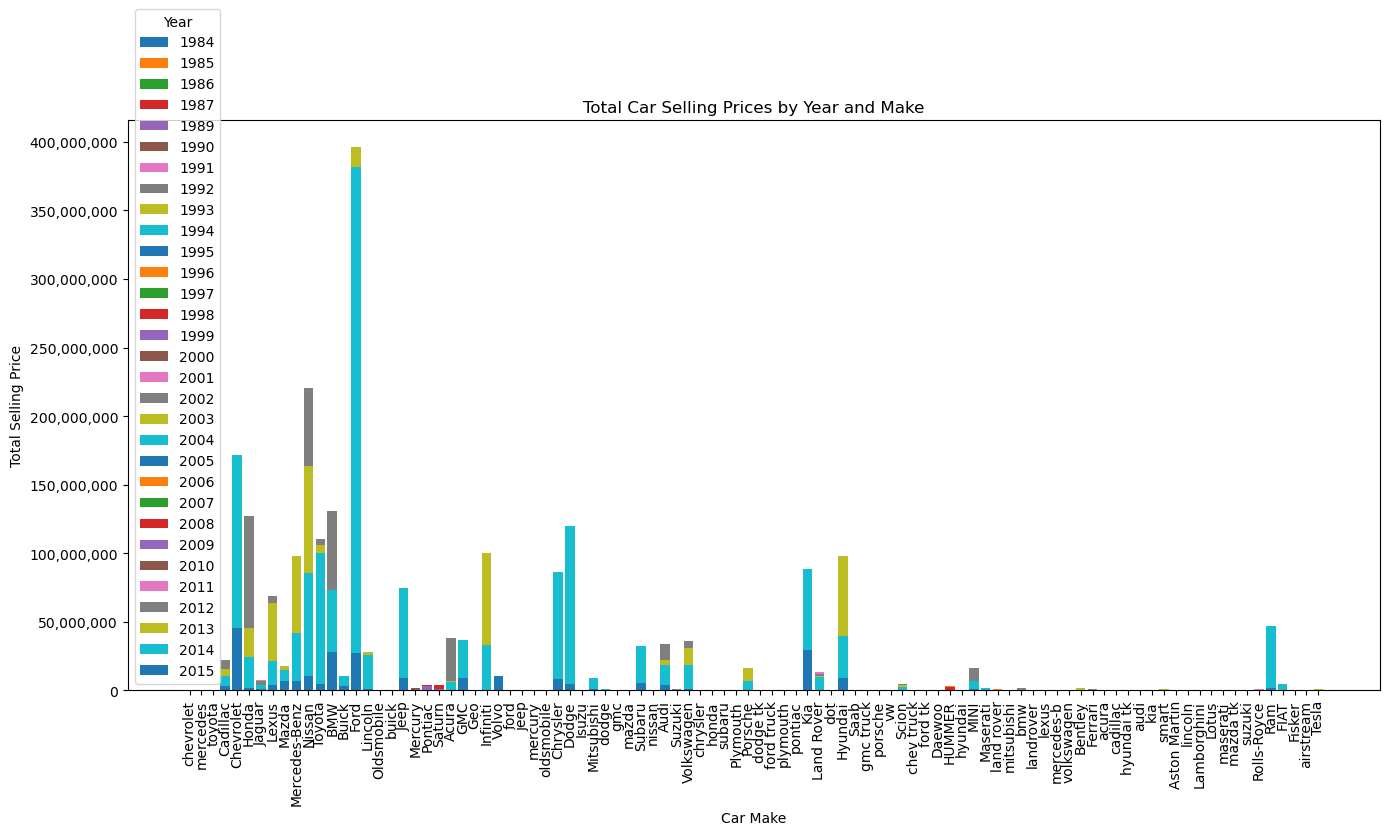

In [16]:
# Plotting the data
plt.figure(figsize=(14, 8))

# Bar plot found this way to make the arguments more lined up and easy to read.
for key, grp in grouped_data.groupby('year'):
    plt.bar(grp['make'], grp['sellingprice'], label=str(key))

plt.xlabel('Car Make')
plt.ylabel('Total Selling Price')
plt.title('Total Car Selling Prices by Year and Make')
plt.legend(title='Year')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [17]:
# Sort the DataFrame by year, make, and selling price
sorted_car_sales_df = car_sales_df.sort_values(by=['year', 'make', 'sellingprice'])

In [18]:
# Group by year and make, average selling prices
grouped_data = sorted_car_sales_df.groupby(['year', 'make'])['sellingprice'].mean().reset_index()


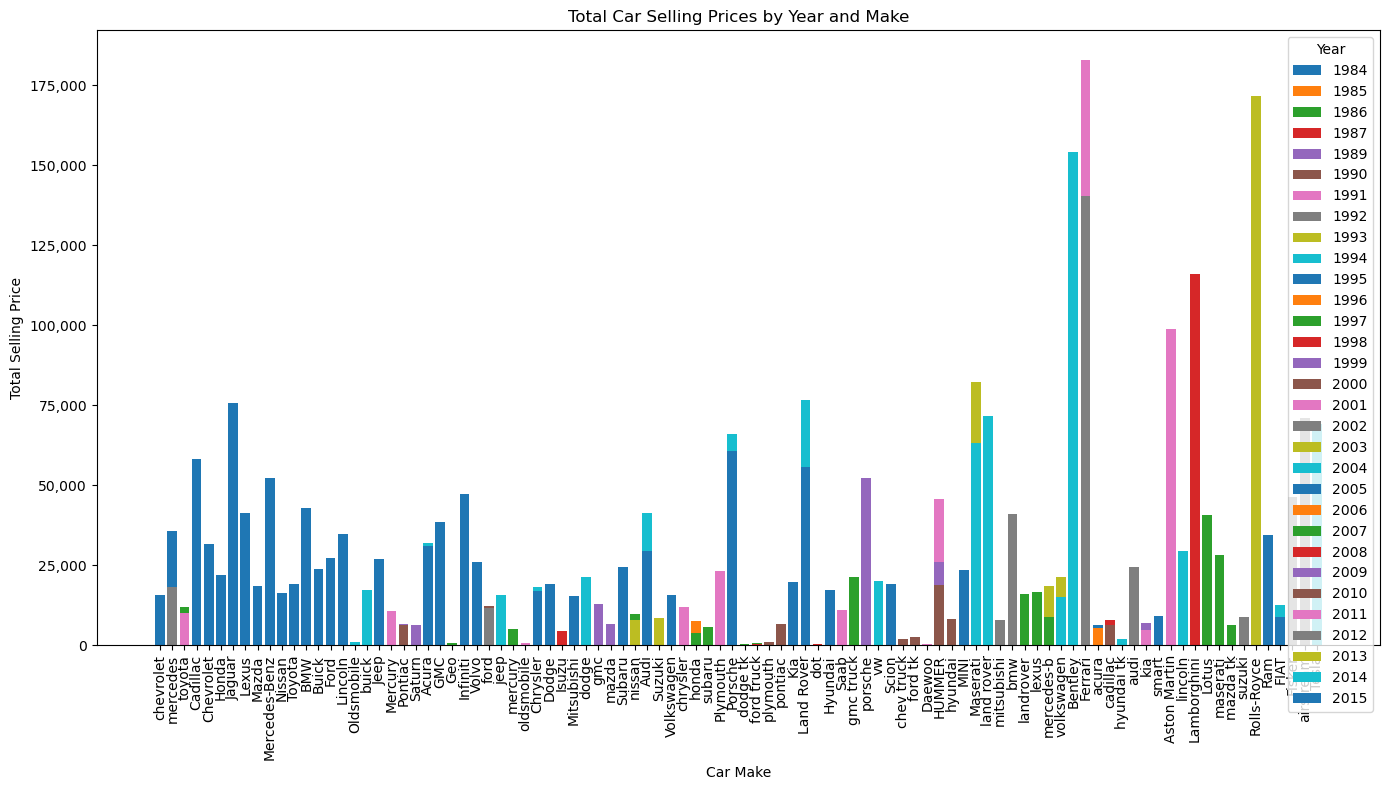

In [19]:
# Plotting the data
plt.figure(figsize=(14, 8))

# Bar plot found this way to make the arguments more lined up and easy to read.
for key, grp in grouped_data.groupby('year'):
    plt.bar(grp['make'], grp['sellingprice'], label=str(key))

plt.xlabel('Car Make')
plt.ylabel('Total Selling Price')
plt.title('Total Car Selling Prices by Year and Make')
plt.legend(title='Year')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [ ]:
#code for the Smallest 5 by average
# I then switched out for largest  to get my top sellers by price
# My different year groupings
start_year = 1984
end_year = 1995

#start_year = 1996
#end_year = 2005

#start_year = 2006
#end_year = 2015

# Setting the start to end year range
sliced_df = car_sales_df.loc[(car_sales_df['year'] >= start_year) & (car_sales_df['year'] <= end_year)]

# Sort the DataFrame by year, make, and selling price
sorted_car_sales_df = sliced_df.sort_values(by=['year', 'make', 'sellingprice'])

In [36]:
# Group by year and model, average selling prices
grouped_data = sorted_car_sales_df.groupby(['year', 'model'])['sellingprice'].mean().reset_index()

# Get the top 5 selling makes for each year
top_5_makes = grouped_data.nsmallest(5, 'sellingprice')

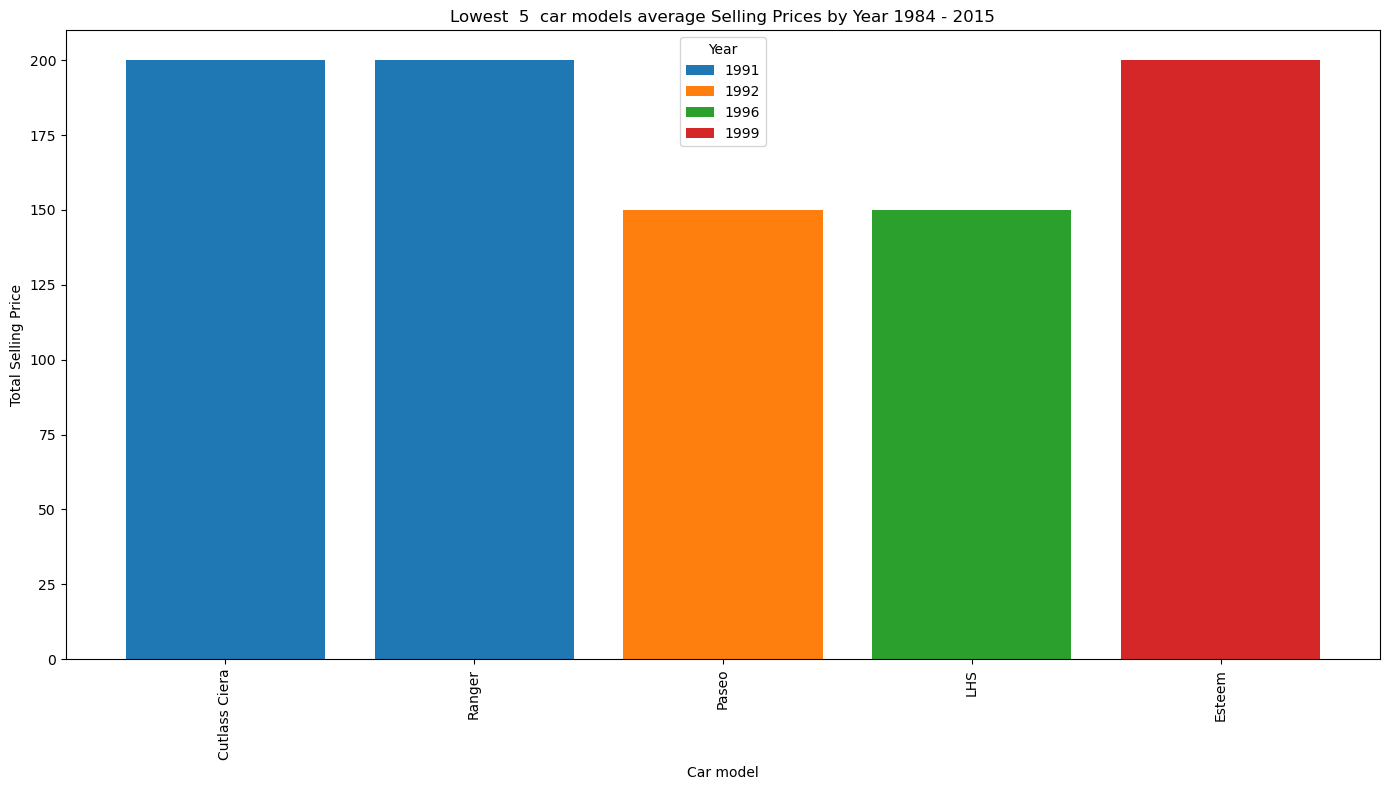

In [38]:
# Plotting the data
plt.figure(figsize=(14, 8))

# Bar plot found this way to make the arguments more lined up and easy to read.
for key, grp in top_5_makes.groupby('year'):
    plt.bar(grp['model'], grp['sellingprice'], label=str(key))

plt.xlabel('Car model')
plt.ylabel('Total Selling Price')
plt.title('Lowest  5  car models average Selling Prices by Year 1984 - 2015')
plt.legend(title='Year')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [24]:
# this was a bonus by manufacturers in 1984 - 2015
# My different year groupings

start_year = 1984
end_year = 1995

#start_year = 1996
#end_year = 2005

#start_year = 2006
#end_year = 2015

# Setting the start to end year range
sliced_df = car_sales_df.loc[(car_sales_df['year'] >= start_year) & (car_sales_df['year'] <= end_year)]

# Sort the DataFrame by year, make, and selling price
sorted_car_sales_df = sliced_df.sort_values(by=['year', 'make', 'sellingprice'])

In [25]:
# Group by year and make, then sum the selling prices
grouped_data = sorted_car_sales_df.groupby(['year', 'make'])['sellingprice'].sum().reset_index()

# Get the top 5 selling makes for each year
top_5_makes = grouped_data.nlargest(5, 'sellingprice')

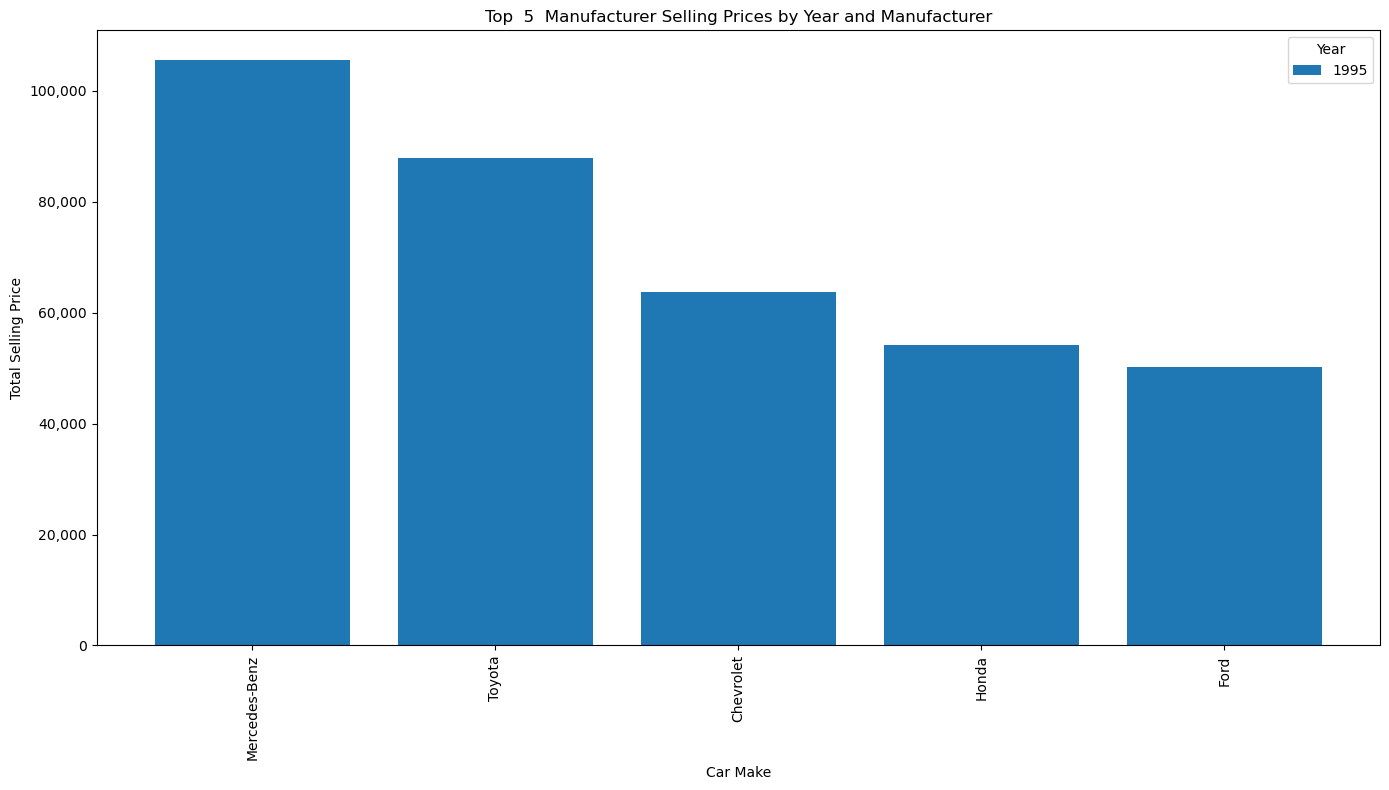

In [26]:
# Plotting the data
plt.figure(figsize=(14, 8))

# Bar plot found this way to make the arguments more lined up and easy to read.
for key, grp in top_5_makes.groupby('year'):
    plt.bar(grp['make'], grp['sellingprice'], label=str(key))

plt.xlabel('Car Make')
plt.ylabel('Total Selling Price')
plt.title('Top  5  Manufacturer Selling Prices by Year and Manufacturer')
plt.legend(title='Year')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()